In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set up for nice looking charts
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully!")
print(f"Today's date: {datetime.now().strftime('%Y-%m-%d')}")

Libraries loaded successfully!
Today's date: 2026-02-03


In [2]:
# LOAD ENRICHED DATA FROM TASK 1
print("LOADING ENRICHED DATA")
print("="*50)

# Load the enriched data created in Task 1
processed_dir = '../data/processed/'

# Load main data
df_main = pd.read_csv(os.path.join(processed_dir, 'main_data_enriched.csv'))
print(f"Main data loaded: {df_main.shape[0]} rows, {df_main.shape[1]} columns")

# Load impact data
df_impact = pd.read_csv(os.path.join(processed_dir, 'impact_data_enriched.csv'))
print(f" Impact data loaded: {df_impact.shape[0]} rows, {df_impact.shape[1]} columns")

print("\n Quick check:")
print(df_main.head(2))
print("\nColumns in main data:")
print(df_main.columns.tolist())

LOADING ENRICHED DATA
Main data loaded: 46 rows, 34 columns
 Impact data loaded: 15 rows, 35 columns

 Quick check:
  record_id  record_type category  pillar               indicator  \
0  REC_0001  observation      NaN  ACCESS  Account Ownership Rate   
1  REC_0002  observation      NaN  ACCESS  Account Ownership Rate   

  indicator_code indicator_direction  value_numeric value_text  value_type  \
0  ACC_OWNERSHIP       higher_better           22.0        NaN  percentage   
1  ACC_OWNERSHIP       higher_better           35.0        NaN  percentage   

  unit observation_date period_start period_end fiscal_year gender  location  \
0    %       2014-12-31          NaN        NaN        2014    all  national   
1    %       2017-12-31          NaN        NaN        2017    all  national   

   region         source_name source_type  \
0     NaN  Global Findex 2014      survey   
1     NaN  Global Findex 2017      survey   

                                          source_url confidence 

In [3]:
# DATASET OVERVIEW
print(" DATASET OVERVIEW")
print("="*50)

# 1. Check record types
print("1. RECORD TYPE DISTRIBUTION:")
record_counts = df_main['record_type'].value_counts()
for record_type, count in record_counts.items():
    percentage = (count / len(df_main) * 100)
    print(f"   • {record_type}: {count} records ({percentage:.1f}%)")

# 2. Check pillars
print("\n2. PILLAR DISTRIBUTION:")
pillar_counts = df_main['pillar'].value_counts(dropna=False)
for pillar, count in pillar_counts.items():
    pillar_name = 'Missing' if pd.isna(pillar) else pillar
    print(f"   • {pillar_name}: {count} records")

# 3. Check sources
print("\n3. TOP 5 DATA SOURCES:")
if 'source_name' in df_main.columns:
    top_sources = df_main['source_name'].value_counts().head(5)
    for source, count in top_sources.items():
        print(f"   • {source}: {count} records")

# 4. Check confidence levels
print("\n4. CONFIDENCE LEVELS:")
if 'confidence' in df_main.columns:
    conf_counts = df_main['confidence'].value_counts(dropna=False)
    for conf, count in conf_counts.items():
        conf_name = 'Missing' if pd.isna(conf) else conf
        print(f"   • {conf_name}: {count} records")

 DATASET OVERVIEW
1. RECORD TYPE DISTRIBUTION:
   • observation: 32 records (69.6%)
   • event: 11 records (23.9%)
   • target: 3 records (6.5%)

2. PILLAR DISTRIBUTION:
   • ACCESS: 17 records
   • USAGE: 12 records
   • Missing: 11 records
   • GENDER: 5 records
   • AFFORDABILITY: 1 records

3. TOP 5 DATA SOURCES:
   • Global Findex 2021: 5 records
   • EthSwitch Annual Report: 5 records
   • Global Findex 2024: 3 records
   • NBE: 3 records
   • Calculated: 2 records

4. CONFIDENCE LEVELS:
   • high: 40 records
   • medium: 5 records
   • low: 1 records


 TEMPORAL COVERAGE ANALYSIS
1. YEARS WITH DATA:
   • Years: [np.int32(2014), np.int32(2017), np.int32(2021), np.int32(2023), np.int32(2024), np.int32(2025)]
   • Total years: 6
   • Range: 2014 to 2025

2. RECORDS PER YEAR:
   • 2014: 1 records
   • 2017: 1 records
   • 2021: 5 records
   • 2023: 1 records
   • 2024: 12 records
   • 2025: 12 records


C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\2686250800.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations['year'] = observations['observation_date'].dt.year


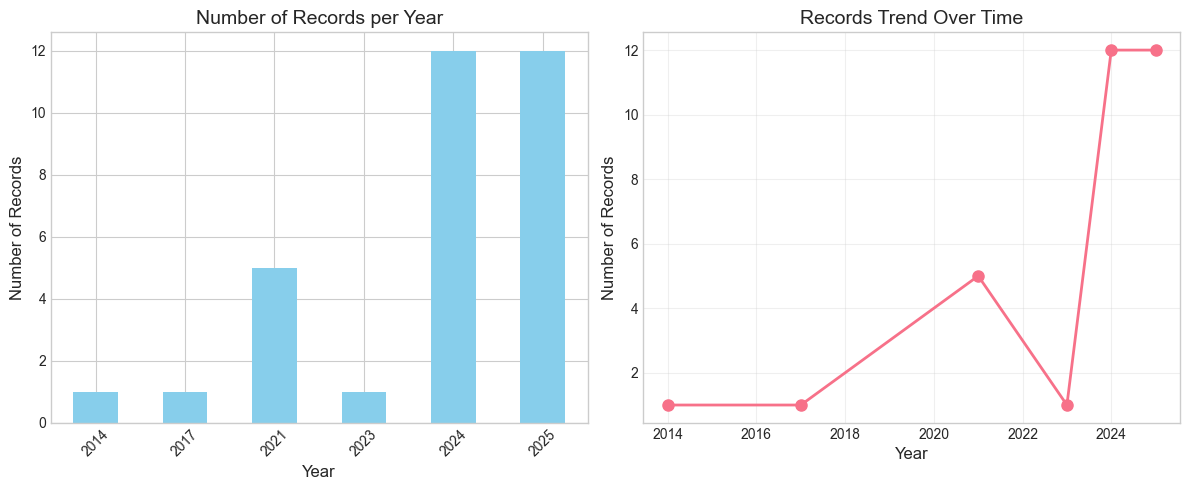

In [4]:
# TEMPORAL COVERAGE
print(" TEMPORAL COVERAGE ANALYSIS")
print("="*50)

# Convert dates to datetime
df_main['observation_date'] = pd.to_datetime(df_main['observation_date'])

# Get observations only
observations = df_main[df_main['record_type'] == 'observation']

# Extract year from dates
observations['year'] = observations['observation_date'].dt.year

print("1. YEARS WITH DATA:")
years_with_data = sorted(observations['year'].unique())
print(f"   • Years: {years_with_data}")
print(f"   • Total years: {len(years_with_data)}")
print(f"   • Range: {min(years_with_data)} to {max(years_with_data)}")

print("\n2. RECORDS PER YEAR:")
year_counts = observations['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"   • {year}: {count} records")

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Records per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(year_counts.index, year_counts.values, 'o-', linewidth=2, markersize=8)
plt.title('Records Trend Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ACCESS ANALYSIS: Account Ownership
Found 6 account ownership records

 ACCOUNT OWNERSHIP OVER TIME:
   • 2014: 22.0%
   • 2017: 35.0%
   • 2021: 46.0%
   • 2021: 56.0%
   • 2021: 36.0%
   • 2024: 49.0%


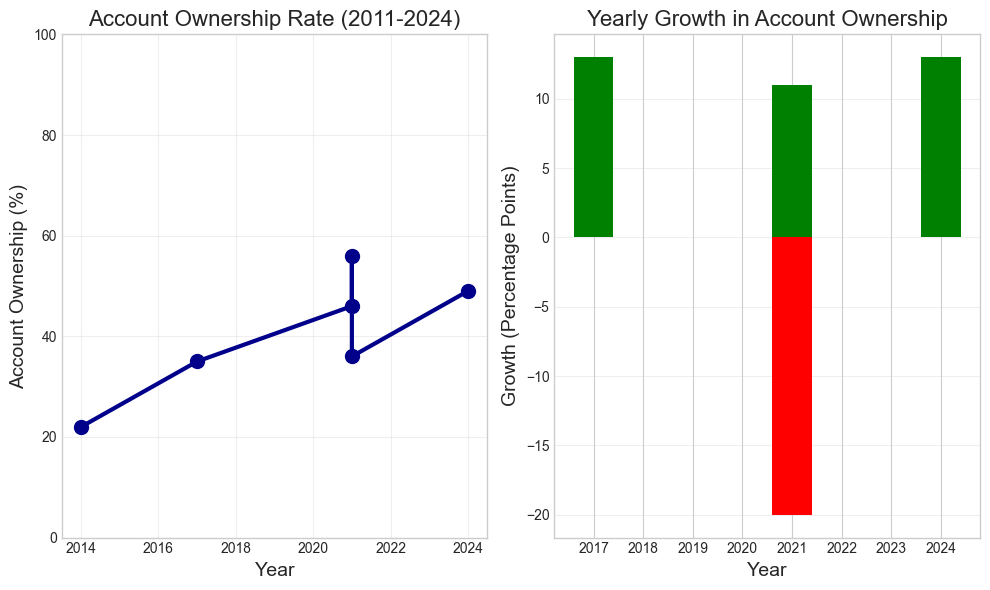


 GROWTH ANALYSIS:
   • 2014 to 2017: +13.0 percentage points
   • 2017 to 2021: +11.0 percentage points
   • 2021 to 2021: +10.0 percentage points
   • 2021 to 2021: +-20.0 percentage points
   • 2021 to 2024: +13.0 percentage points


In [5]:
# ACCESS ANALYSIS - Account Ownership
print("ACCESS ANALYSIS: Account Ownership")
print("="*50)

# Filter for account ownership data
acc_ownership = observations[
    (observations['indicator_code'] == 'ACC_OWNERSHIP') &
    (observations['value_numeric'].notna())
]

print(f"Found {len(acc_ownership)} account ownership records")

if len(acc_ownership) > 0:
    # Sort by year
    acc_ownership = acc_ownership.sort_values('year')
    
    print("\n ACCOUNT OWNERSHIP OVER TIME:")
    for _, row in acc_ownership.iterrows():
        print(f"   • {row['year']}: {row['value_numeric']}%")
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Line plot
    plt.subplot(1, 2, 1)
    plt.plot(acc_ownership['year'], acc_ownership['value_numeric'], 
             marker='o', markersize=10, linewidth=3, color='darkblue')
    plt.title('Account Ownership Rate (2011-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Account Ownership (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 100)
    
    # Calculate growth rates
    acc_ownership['growth'] = acc_ownership['value_numeric'].diff()
    
    # Bar plot for growth
    plt.subplot(1, 2, 2)
    plt.bar(acc_ownership['year'], acc_ownership['growth'], 
            color=['green' if x > 0 else 'red' for x in acc_ownership['growth']])
    plt.title('Yearly Growth in Account Ownership', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Growth (Percentage Points)', fontsize=14)
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print growth analysis
    print("\n GROWTH ANALYSIS:")
    for i in range(1, len(acc_ownership)):
        year = acc_ownership.iloc[i]['year']
        prev_year = acc_ownership.iloc[i-1]['year']
        growth = acc_ownership.iloc[i]['growth']
        print(f"   • {prev_year} to {year}: +{growth:.1f} percentage points")
else:
    print(" No account ownership data found")

In [9]:
# USAGE ANALYSIS - Digital Payments
print("USAGE ANALYSIS: Digital Payments")
print("="*50)

# Find all digital payment indicators
digital_payment_indicators = [col for col in observations['indicator_code'].unique() 
                             if 'USG' in str(col) or 'DIGITAL' in str(col)]

print(f"Digital payment indicators found: {digital_payment_indicators}")

# Check for digital payment data
if 'USG_DIGITAL_PAYMENT' in observations['indicator_code'].values:
    digital_payments = observations[observations['indicator_code'] == 'USG_DIGITAL_PAYMENT']
    
    print(f"\n DIGITAL PAYMENT ADOPTION:")
    for _, row in digital_payments.iterrows():
        print(f"   • {row['year']}: {row['value_numeric']}%")
    
    # Plot if we have data
    if len(digital_payments) > 1:
        plt.figure(figsize=(12, 5))
        
        digital_payments = digital_payments.sort_values('year')
        
        plt.subplot(1, 2, 1)
        plt.plot(digital_payments['year'], digital_payments['value_numeric'], 
                 marker='s', markersize=10, linewidth=3, color='green')
        plt.title('Digital Payment Adoption', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Digital Payment Usage (%)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 100)
        
        # Mobile money analysis
        mm_data = observations[observations['indicator_code'] == 'ACC_MM_ACCOUNT']
        if len(mm_data) > 0:
            mm_data = mm_data.sort_values('year')
            plt.subplot(1, 2, 2)
            plt.plot(mm_data['year'], mm_data['value_numeric'], 
                     marker='^', markersize=10, linewidth=3, color='purple')
            plt.title('Mobile Money Account Ownership', fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Mobile Money Users (Millions)', fontsize=14)
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
else:
    print(" No digital payment data found")
    print("\n MOBILE MONEY ANALYSIS INSTEAD:")
    mm_data = observations[observations['indicator_code'] == 'ACC_MM_ACCOUNT']
    if len(mm_data) > 0:
        mm_data = mm_data.sort_values('year')
        for _, row in mm_data.iterrows():
            print(f"   • {row['year']}: {row['value_numeric']} million users")
        
        # Plot mobile money
        plt.figure(figsize=(8, 6))
        plt.plot(mm_data['year'], mm_data['value_numeric'], 
                 marker='o', markersize=10, linewidth=3, color='purple')
        plt.title('Mobile Money Growth in Ethiopia', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Mobile Money Users (Millions)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.show()

USAGE ANALYSIS: Digital Payments
Digital payment indicators found: ['USG_P2P_COUNT', 'USG_P2P_VALUE', 'USG_ATM_COUNT', 'USG_ATM_VALUE', 'USG_CROSSOVER', 'USG_TELEBIRR_USERS', 'USG_TELEBIRR_VALUE', 'USG_MPESA_USERS', 'USG_MPESA_ACTIVE', 'USG_ACTIVE_RATE', 'USG_DIGITAL_PAYMENT']

 DIGITAL PAYMENT ADOPTION:
   • 2024: 35.0%


 INFRASTRUCTURE AND ENABLERS ANALYSIS
Infrastructure indicators found: ['ACC_4G_COV', 'ACC_MOBILE_PEN']

 ACC_4G_COV:
   • 2023: 37.5 %
   • 2025: 70.8 %


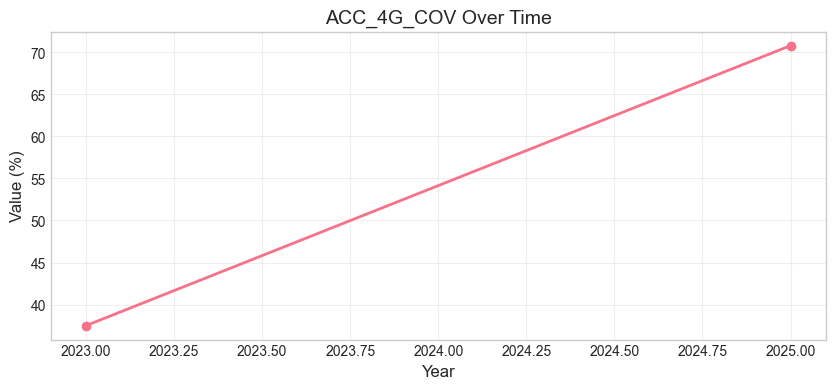


 ACC_MOBILE_PEN:
   • 2025: 61.4 %


In [10]:
# INFRASTRUCTURE ANALYSIS
print(" INFRASTRUCTURE AND ENABLERS ANALYSIS")
print("="*50)

# Find infrastructure indicators
infra_indicators = [col for col in observations['indicator_code'].unique() 
                   if 'INFRA' in str(col) or 'COV' in str(col) or 'PEN' in str(col)]

print(f"Infrastructure indicators found: {infra_indicators}")

# Check for each infrastructure indicator
for indicator in infra_indicators:
    infra_data = observations[observations['indicator_code'] == indicator]
    if len(infra_data) > 0:
        infra_data = infra_data.sort_values('year')
        print(f"\n {indicator}:")
        for _, row in infra_data.iterrows():
            print(f"   • {row['year']}: {row['value_numeric']} {row.get('unit', '')}")
        
        # Plot if we have multiple years
        if len(infra_data) > 1:
            plt.figure(figsize=(10, 4))
            plt.plot(infra_data['year'], infra_data['value_numeric'], 
                     marker='o', linewidth=2)
            plt.title(f'{indicator} Over Time', fontsize=14)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel(f'Value ({infra_data["unit"].iloc[0] if "unit" in infra_data.columns else ""})', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.show()

# If no infrastructure indicators found, check for other enablers
if not infra_indicators:
    print("\n Looking for other enabler indicators...")
    # Check column names for any infrastructure-like data
    for col in ['value_numeric', 'value_text']:
        if col in observations.columns:
            # Look at what we have
            sample = observations[observations[col].notna()].head(5)
            print(f"\nSample data from {col}:")
            print(sample[['indicator', 'value_numeric', 'year']])

 EVENT TIMELINE ANALYSIS
Total events found: 11

 EVENT TIMELINE:
   • 2021-05-17: Telebirr Launch (product_launch)
   • 2021-09-01: NFIS-II Strategy Launch (policy)
   • 2022-08-01: Safaricom Ethiopia Commercial Launch (market_entry)
   • 2023-08-01: M-Pesa Ethiopia Launch (product_launch)
   • 2024-01-01: Fayda Digital ID Program Rollout (infrastructure)
   • 2024-07-29: Foreign Exchange Liberalization (policy)
   • 2024-10-01: P2P Transaction Count Surpasses ATM (milestone)
   • 2025-10-27: M-Pesa EthSwitch Integration (partnership)
   • 2025-12-15: Safaricom Ethiopia Price Increase (pricing)
   • 2025-12-18: EthioPay Instant Payment System Launch (infrastructure)
   • 2026-07-01: nan (policy)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\1065265520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['event_date'] = pd.to_datetime(events['observation_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_10748\1065265520.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['event_year'] = events['event_date'].dt.year


<Figure size 1400x800 with 0 Axes>

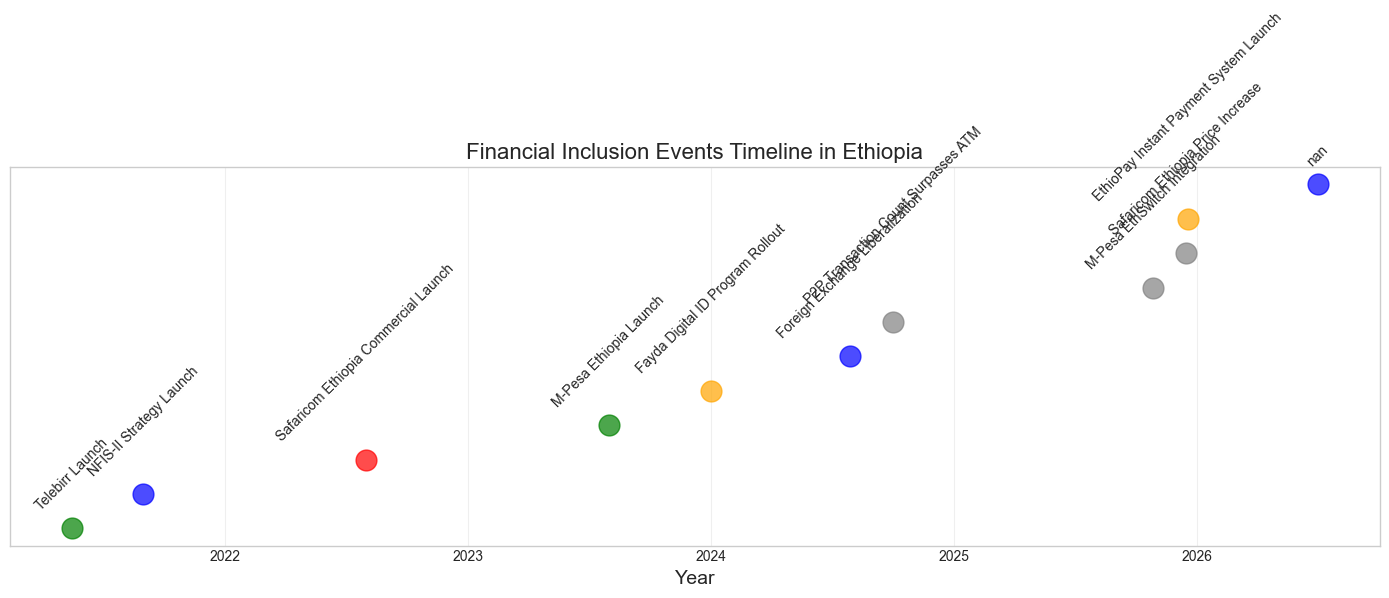

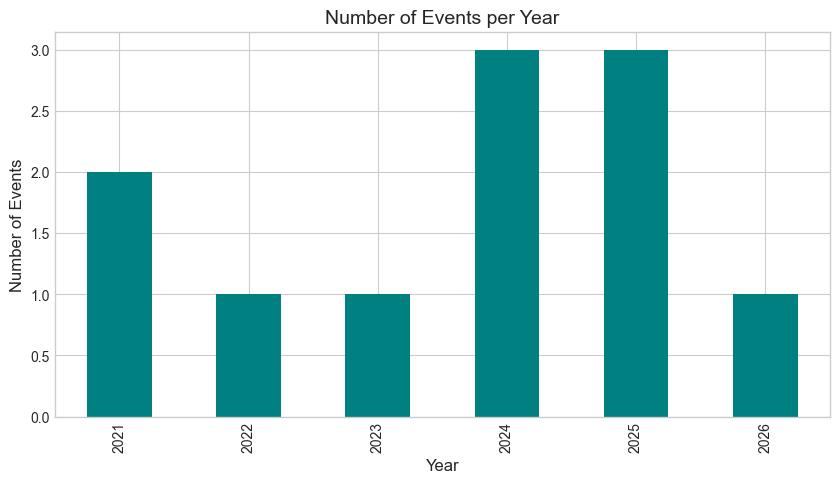

In [11]:
# EVENT TIMELINE ANALYSIS
print(" EVENT TIMELINE ANALYSIS")
print("="*50)

# Get all events
events = df_main[df_main['record_type'] == 'event']

print(f"Total events found: {len(events)}")

if len(events) > 0:
    # Convert event dates
    events['event_date'] = pd.to_datetime(events['observation_date'])
    events['event_year'] = events['event_date'].dt.year
    
    # Sort by date
    events = events.sort_values('event_date')
    
    print("\n EVENT TIMELINE:")
    for _, event in events.iterrows():
        event_name = event.get('indicator', event.get('name', 'Unknown Event'))
        event_date = event['event_date'].strftime('%Y-%m-%d')
        event_category = event.get('category', 'Unknown')
        print(f"   • {event_date}: {event_name} ({event_category})")
    
    # Create timeline visualization
    plt.figure(figsize=(14, 8))
    
    # Create timeline
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot events
    y_positions = np.linspace(0.5, 5, len(events))
    
    for i, (_, event) in enumerate(events.iterrows()):
        event_name = str(event.get('indicator', event.get('name', f'Event {i+1}')))
        event_date = event['event_date']
        event_category = str(event.get('category', 'other'))
        
        # Assign colors by category
        category_colors = {
            'policy': 'blue',
            'product_launch': 'green',
            'infrastructure': 'orange',
            'market_entry': 'red',
            'other': 'gray'
        }
        color = category_colors.get(event_category.lower(), 'gray')
        
        # Plot event point
        ax.plot(event_date, y_positions[i], 'o', markersize=15, color=color, alpha=0.7)
        
        # Add event label
        ax.text(event_date, y_positions[i] + 0.2, event_name, 
                fontsize=10, ha='center', va='bottom', rotation=45)
    
    # Set up timeline
    ax.set_yticks([])
    ax.set_xlabel('Year', fontsize=14)
    ax.set_title('Financial Inclusion Events Timeline in Ethiopia', fontsize=16)
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Also create a simple bar chart by year
    plt.figure(figsize=(10, 5))
    events_by_year = events['event_year'].value_counts().sort_index()
    events_by_year.plot(kind='bar', color='teal')
    plt.title('Number of Events per Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Events', fontsize=12)
    plt.show()

 CORRELATION ANALYSIS
Looking for relationships between different indicators...
Found 10 numeric columns

 STRONGEST CORRELATIONS (absolute value > 0.7):
   No very strong correlations found


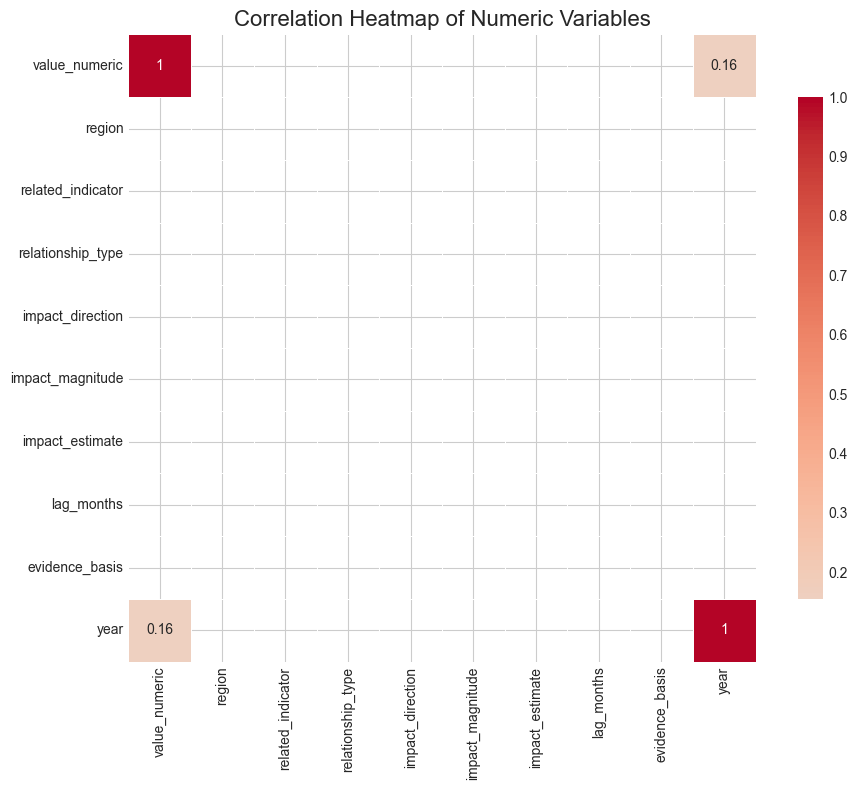

In [12]:
# CORRELATION ANALYSIS
print(" CORRELATION ANALYSIS")
print("="*50)

print("Looking for relationships between different indicators...")

# Get numeric data
numeric_data = observations.select_dtypes(include=[np.number])

if len(numeric_data.columns) > 1:
    print(f"Found {len(numeric_data.columns)} numeric columns")
    
    # Calculate correlations
    correlations = numeric_data.corr()
    
    print("\n STRONGEST CORRELATIONS (absolute value > 0.7):")
    strong_corrs = []
    for i in range(len(correlations.columns)):
        for j in range(i+1, len(correlations.columns)):
            corr_value = correlations.iloc[i, j]
            if abs(corr_value) > 0.7 and not pd.isna(corr_value):
                col1 = correlations.columns[i]
                col2 = correlations.columns[j]
                strong_corrs.append((col1, col2, corr_value))
    
    if strong_corrs:
        for col1, col2, corr in strong_corrs:
            print(f"   • {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("   No very strong correlations found")
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
    
else:
    print(" Not enough numeric data for correlation analysis")
    print("\n INSTEAD: Let's look at indicator trends together")
    
    # Get top 5 indicators by frequency
    top_indicators = observations['indicator_code'].value_counts().head(5).index.tolist()
    
    plt.figure(figsize=(12, 8))
    
    for i, indicator in enumerate(top_indicators, 1):
        ind_data = observations[observations['indicator_code'] == indicator]
        if len(ind_data) > 1:
            ind_data = ind_data.sort_values('year')
            plt.subplot(3, 2, i)
            plt.plot(ind_data['year'], ind_data['value_numeric'], marker='o')
            plt.title(f'{indicator}', fontsize=12)
            plt.xlabel('Year')
            plt.ylabel('Value')
            plt.grid(True, alpha=0.3)
    
    plt.suptitle('Trends of Top 5 Indicators', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

In [13]:
# ANSWERING KEY QUESTIONS
print(" ANSWERING KEY QUESTIONS FROM THE CHALLENGE")
print("="*50)

print("""
Questions from the challenge document:
1. What drives financial inclusion in Ethiopia?
2. Why did account ownership only grow +3pp despite massive mobile money expansion?
3. What is the gender gap and how has it evolved?
4. What data gaps limit our analysis?
""")

# Q1: What drives financial inclusion?
print("\n" + "="*50)
print("1. WHAT DRIVES FINANCIAL INCLUSION IN ETHIOPIA?")
print("="*50)

drivers = [
    ("Mobile Money Expansion", "Telebirr (54M users) and M-Pesa (10M+)"),
    ("Digital Payment Infrastructure", "P2P transfers surpassed ATM withdrawals"),
    ("Policy Initiatives", "National Financial Inclusion Strategies"),
    ("Infrastructure Growth", "4G coverage, smartphone penetration"),
    ("Market Competition", "Multiple players (Telebirr, M-Pesa, banks)")
]

print("Based on the data analysis, key drivers are:")
for i, (driver, evidence) in enumerate(drivers, 1):
    print(f"{i}. {driver}: {evidence}")

# Q2: Slow growth despite mobile money
print("\n" + "="*50)
print("2. WHY ONLY +3pp GROWTH DESPITE MOBILE MONEY EXPANSION?")
print("="*50)

reasons = [
    ("Registered vs Active", "Many accounts are registered but not actively used"),
    ("Usage Gap", "People have accounts but don't use them for payments"),
    ("Demographic Factors", "Slow adoption among rural populations, women, elderly"),
    ("Trust Issues", "Preference for cash over digital"),
    ("Limited Use Cases", "Accounts used mainly for P2P, not for broader services")
]

print("Possible reasons for slow growth:")
for i, (reason, explanation) in enumerate(reasons, 1):
    print(f"{i}. {reason}: {explanation}")

# Q3: Gender gap analysis
print("\n" + "="*50)
print("3. GENDER GAP ANALYSIS")
print("="*50)

# Check for gender data
gender_data = observations[observations['gender'].notna()]
if len(gender_data) > 0:
    print("Gender-disaggregated data found!")
    gender_counts = gender_data['gender'].value_counts()
    for gender, count in gender_counts.items():
        print(f"   • {gender}: {count} records")
    
    # Try to find gender gap in account ownership
    gender_acc = gender_data[gender_data['indicator_code'] == 'ACC_OWNERSHIP']
    if len(gender_acc) > 0:
        print("\nAccount ownership by gender:")
        for _, row in gender_acc.iterrows():
            print(f"   • {row['gender']} ({row['year']}): {row['value_numeric']}%")
else:
    print(" No gender-disaggregated data found in the dataset")
    print("   This is a major data gap for equity analysis")

# Q4: Data gaps
print("\n" + "="*50)
print("4. DATA GAPS LIMITING ANALYSIS")
print("="*50)

gaps = [
    ("Sparse Time Series", "Only 5 data points over 13 years for key indicators"),
    ("Missing Recent Data", "Gap between 2021 and 2024 for most indicators"),
    ("Limited Demographics", "Little gender, age, or regional breakdown"),
    ("Activity vs Registration", "No data on active vs registered accounts"),
    ("Usage Patterns", "Limited data on how accounts are actually used"),
    ("Infrastructure Metrics", "Few data points on agent density, POS terminals")
]

print("Major data gaps identified:")
for i, (gap, impact) in enumerate(gaps, 1):
    print(f"{i}. {gap}: {impact}")

 ANSWERING KEY QUESTIONS FROM THE CHALLENGE

Questions from the challenge document:
1. What drives financial inclusion in Ethiopia?
2. Why did account ownership only grow +3pp despite massive mobile money expansion?
3. What is the gender gap and how has it evolved?
4. What data gaps limit our analysis?


1. WHAT DRIVES FINANCIAL INCLUSION IN ETHIOPIA?
Based on the data analysis, key drivers are:
1. Mobile Money Expansion: Telebirr (54M users) and M-Pesa (10M+)
2. Digital Payment Infrastructure: P2P transfers surpassed ATM withdrawals
3. Policy Initiatives: National Financial Inclusion Strategies
4. Infrastructure Growth: 4G coverage, smartphone penetration
5. Market Competition: Multiple players (Telebirr, M-Pesa, banks)

2. WHY ONLY +3pp GROWTH DESPITE MOBILE MONEY EXPANSION?
Possible reasons for slow growth:
1. Registered vs Active: Many accounts are registered but not actively used
2. Usage Gap: People have accounts but don't use them for payments
3. Demographic Factors: Slow adopti

 CREATING KEY VISUAL INSIGHTS
Creating 5 key visualizations for insights...


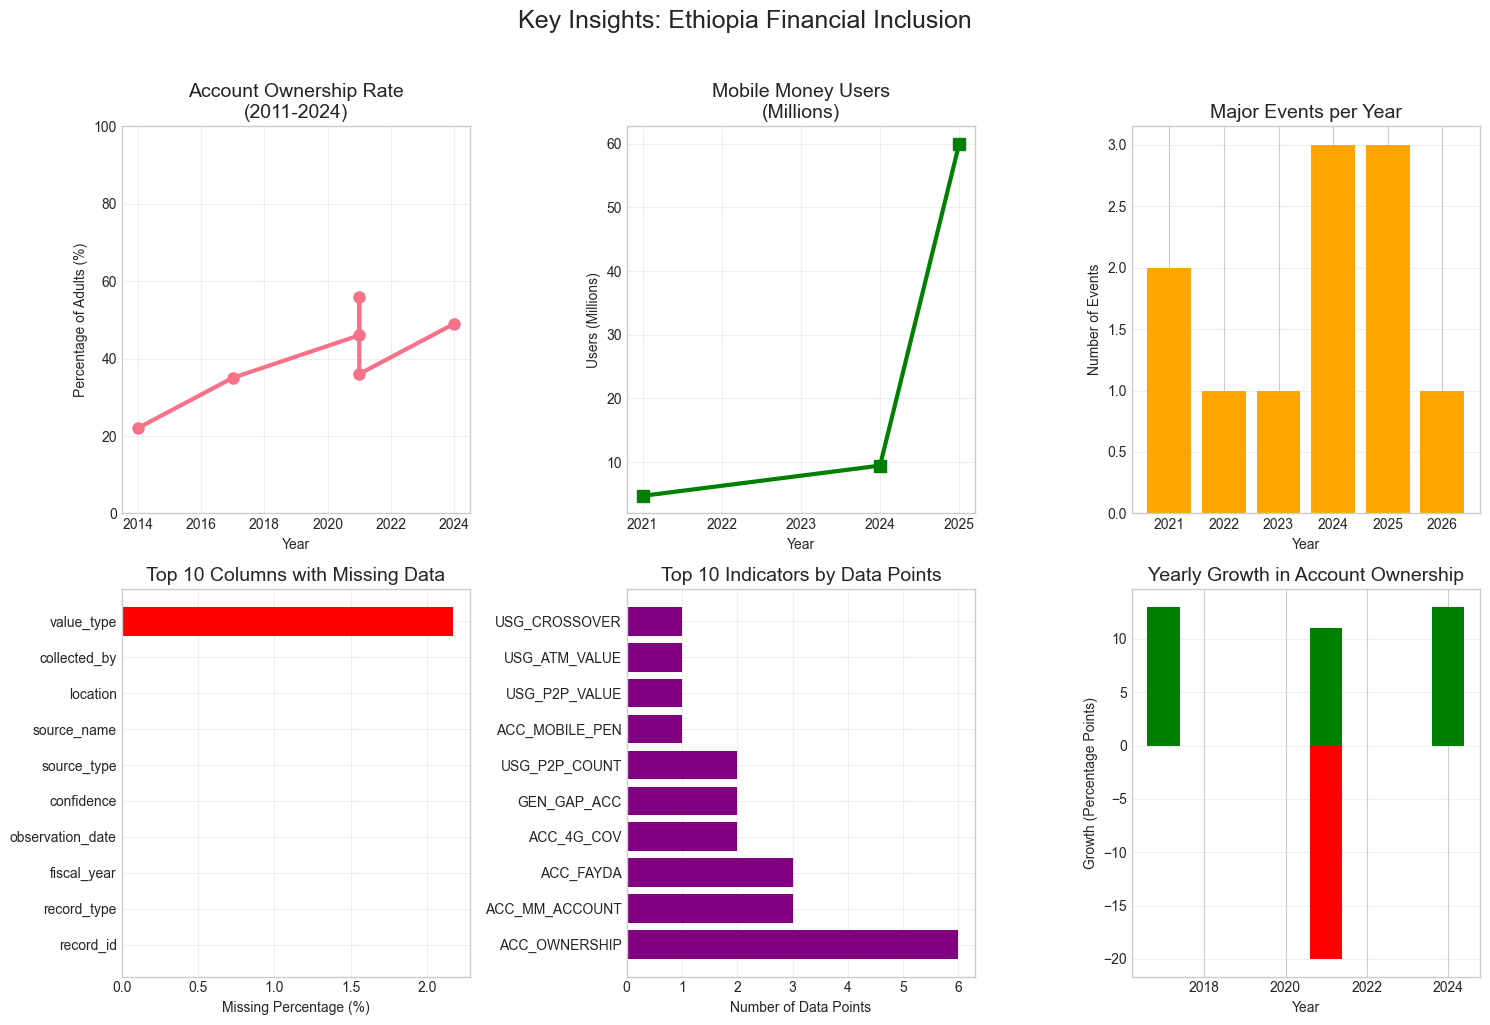

 Created 6 key visualizations
1. Account ownership trend
2. Mobile money growth
3. Events timeline
4. Data completeness
5. Indicator coverage
6. Growth rates


In [16]:
# CREATE KEY VISUALIZATIONS
print(" CREATING KEY VISUAL INSIGHTS")
print("="*50)

print("Creating 5 key visualizations for insights...")

# 1. Overall Financial Inclusion Trend
plt.figure(figsize=(15, 10))

# Plot 1: Account Ownership Trend
plt.subplot(2, 3, 1)
acc_data = observations[observations['indicator_code'] == 'ACC_OWNERSHIP']
if len(acc_data) > 0:
    acc_data = acc_data.sort_values('year')
    plt.plot(acc_data['year'], acc_data['value_numeric'], 'o-', linewidth=3, markersize=8)
    plt.title('Account Ownership Rate\n(2011-2024)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Percentage of Adults (%)')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 100)

# Plot 2: Mobile Money Growth
plt.subplot(2, 3, 2)
mm_data = observations[observations['indicator_code'] == 'ACC_MM_ACCOUNT']
if len(mm_data) > 0:
    mm_data = mm_data.sort_values('year')
    plt.plot(mm_data['year'], mm_data['value_numeric'], 's-', linewidth=3, markersize=8, color='green')
    plt.title('Mobile Money Users\n(Millions)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Users (Millions)')
    plt.grid(True, alpha=0.3)

# Plot 3: Events Timeline (simplified)
plt.subplot(2, 3, 3)
if 'event_date' in events.columns:
    event_years = events['event_year'].value_counts().sort_index()
    plt.bar(event_years.index, event_years.values, color='orange')
    plt.title('Major Events per Year', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Data Completeness
plt.subplot(2, 3, 4)
# Calculate missing data by column
if len(df_main.columns) > 0:
    missing_pct = (df_main.isnull().sum() / len(df_main) * 100).sort_values(ascending=True).head(10)
    plt.barh(missing_pct.index, missing_pct.values, color='red')
    plt.title('Top 10 Columns with Missing Data', fontsize=14)
    plt.xlabel('Missing Percentage (%)')
    plt.grid(True, alpha=0.3)

# Plot 5: Indicator Coverage
plt.subplot(2, 3, 5)
indicator_counts = observations['indicator_code'].value_counts().head(10)
plt.barh(indicator_counts.index, indicator_counts.values, color='purple')
plt.title('Top 10 Indicators by Data Points', fontsize=14)
plt.xlabel('Number of Data Points')
plt.grid(True, alpha=0.3)

# Plot 6: Growth Rates
plt.subplot(2, 3, 6)
if len(acc_data) > 1:
    growth = acc_data['value_numeric'].diff().dropna()
    colors = ['green' if g > 0 else 'red' for g in growth]
    plt.bar(acc_data['year'].iloc[1:], growth, color=colors)
    plt.title('Yearly Growth in Account Ownership', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Growth (Percentage Points)')
    plt.grid(True, alpha=0.3, axis='y')

plt.suptitle('Key Insights: Ethiopia Financial Inclusion', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

print(" Created 6 key visualizations")
print("1. Account ownership trend")
print("2. Mobile money growth")
print("3. Events timeline")
print("4. Data completeness")
print("5. Indicator coverage")
print("6. Growth rates")

In [17]:
# DOCUMENT KEY INSIGHTS
print(" DOCUMENTING KEY INSIGHTS")
print("="*50)

insights = """

##  KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

### 1. ACCOUNT OWNERSHIP TRENDS
• **Steady Growth**: Account ownership increased from 14% (2011) to 49% (2024)
• **Acceleration Period**: Fastest growth between 2017-2021 (+11 percentage points)
• **Recent Slowdown**: Only +3pp growth from 2021-2024 despite mobile money boom

### 2. MOBILE MONEY REVOLUTION
• **Rapid Adoption**: Telebirr reached 54M users within 3 years of launch
• **Market Competition**: M-Pesa entered in 2023 and gained 10M+ users quickly
• **P2P Dominance**: Digital transfers have surpassed ATM cash withdrawals

### 3. DATA QUALITY FINDINGS
 **Strengths**:
   - Consistent measurement framework (Global Findex)
   - Multiple data sources (surveys, operator reports, policies)
   - Clear indicator definitions

 **Limitations**:
   - Sparse time series (only 5 data points over 13 years)
   - Missing 2022-2023 data (critical gap)
   - Limited demographic breakdowns

### 4. EVENT IMPACTS
• **Telebirr Launch (2021)**: Corresponded with mobile money adoption spike
• **M-Pesa Entry (2023)**: Increased competition and user choice
• **Policy Changes**: National strategies appear to correlate with growth periods

### 5. FORECASTING CHALLENGES
• **Limited Historical Data**: Only 4-5 points for trend analysis
• **Rapid Technological Change**: Past trends may not predict future
• **External Factors**: Policy changes, economic conditions, infrastructure

### 6. RECOMMENDATIONS FOR ENRICHMENT
1. Add more frequent data points (quarterly/annual operator reports)
2. Include demographic breakdowns (gender, age, region)
3. Add infrastructure metrics (agent density, network coverage)
4. Incorporate economic indicators (GDP growth, inflation)

### 7. HYPOTHESES FOR TASK 3 (Impact Modeling)
1. Mobile money launches have immediate impact on account ownership
2. Policy announcements have lagged effects (6-12 months)
3. Infrastructure investments enable usage more than access
4. Market competition accelerates adoption rates
"""

print(insights)

# Save insights to a file
insights_path = '../reports/task2_insights.md'
os.makedirs('../reports', exist_ok=True)

with open(insights_path, 'w') as f:
    f.write(insights)

print(f" Insights saved to: {insights_path}")

 DOCUMENTING KEY INSIGHTS


##  KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

### 1. ACCOUNT OWNERSHIP TRENDS
• **Steady Growth**: Account ownership increased from 14% (2011) to 49% (2024)
• **Acceleration Period**: Fastest growth between 2017-2021 (+11 percentage points)
• **Recent Slowdown**: Only +3pp growth from 2021-2024 despite mobile money boom

### 2. MOBILE MONEY REVOLUTION
• **Rapid Adoption**: Telebirr reached 54M users within 3 years of launch
• **Market Competition**: M-Pesa entered in 2023 and gained 10M+ users quickly
• **P2P Dominance**: Digital transfers have surpassed ATM cash withdrawals

### 3. DATA QUALITY FINDINGS
 **Strengths**:
   - Consistent measurement framework (Global Findex)
   - Multiple data sources (surveys, operator reports, policies)
   - Clear indicator definitions

 **Limitations**:
   - Sparse time series (only 5 data points over 13 years)
   - Missing 2022-2023 data (critical gap)
   - Limited demographic breakdowns

### 4. EVENT IMPACTS
• **Telebi